In [81]:
import os
import seaborn as sns
import pandas as pd
from google.colab import drive
import numpy as np
from osgeo import gdal
from matplotlib import pyplot as plt

from __future__ import division
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

from osgeo import ogr

In [82]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
!pip install -q xlrd

In [84]:
path_ = "/content/drive/MyDrive/Knowledge/Data_Science_Prj/lc_2017.tif"

In [85]:
ds = gdal.Open(path_)
ds_band = ds.GetRasterBand(1)
nodataval = ds_band.GetNoDataValue()
ds_arr = ds.ReadAsArray().astype(np.int64)
print(ds_arr)
print(ds_arr.shape)
print(nodataval)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3029, 2540)
None


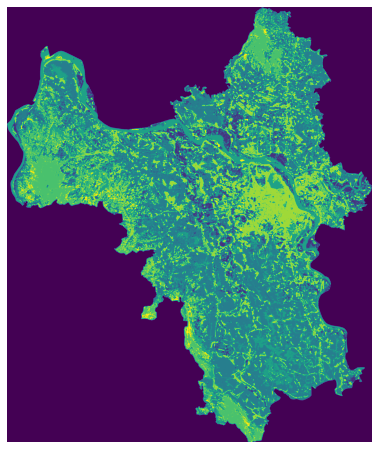

In [86]:
#View the data we're using
plt.figure(figsize = (8, 8))
plt.axis("off")
img = plt.imshow(ds_arr, cmap = "viridis")

In [87]:
uniq = np.unique(ds_arr)
uniq = np.delete(uniq, 0)
print(uniq)

[1 2 3 4 5 6 7]


In [88]:
df=pd.read_excel('/content/drive/MyDrive/Knowledge/Data_Science_Prj/EPA_merged_2019.xlsx')

In [89]:
point_set = df.drop_duplicates(subset=['Lat', 'Lon'])
point_set = point_set.loc[:,['Lat', 'Lon']]
lat_lon = point_set.to_numpy()
print(lat_lon)

[[ 21.0263 105.8515]
 [ 21.0399 105.8473]
 [ 21.0074 105.8358]
 [ 21.05   105.74  ]
 [ 21.0269 105.7731]
 [ 21.05   105.782 ]
 [ 21.0197 105.8147]
 [ 21.0152 105.7999]
 [ 20.9883 105.8549]
 [ 21.0058 105.7485]]


In [90]:
name_set = df.drop_duplicates(subset = ['Name'])
name_set = name_set.loc[:,['Name']]
name_list = name_set.to_numpy()
print(name_list)

[['hoankiem']
 ['hangdau']
 ['kimlien']
 ['minhkhai']
 ['mydinh']
 ['pvd']
 ['thanhcong']
 ['chicuc']
 ['tanmai']
 ['taymo']]


In [91]:
def filter_str(obj):
    nm = str(obj)
    nm = nm.replace("[",'')
    nm = nm.replace(']','')
    return nm.replace("'",'')

In [92]:
prj = ds.GetProjection()
gt = ds.GetGeoTransform()
print(prj)
print(gt)

PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]
(529605.0, 30.0, 0.0, 2365125.0, 0.0, -30.0)


In [93]:
!pip install pyproj

In [94]:
from pyproj import Proj
prj = Proj('+proj=utm +zone=48 +ellps=WGS84 +datum=WGS84 +units=m +no_defs', preserve_units=False, errcheck=True)

In [95]:
lat_lon_after = []
for p in lat_lon:   lat_lon_after.append(prj(p[1], p[0]))

print(lat_lon_after)

[(588482.3081783054, 2325294.2526949174), (588037.857835659, 2326797.2090993715), (586861.724449972, 2323193.747170578), (576883.2770319555, 2327859.6292411787), (580334.7832654524, 2325319.215299665), (581247.1194804814, 2327880.448834465), (584661.822486213, 2324543.802991303), (583126.2578250611, 2324037.9645576538), (588858.1323010594, 2321090.2226356324), (577789.3663453121, 2322971.6867247666)]


In [96]:
def get_coords_at_point(gt, pos):
    row = int((pos[0] - gt[0])/(gt[1]))
    col = int((pos[1] - gt[3])/(gt[5]))
    return col, row

In [97]:
point_coor = []
for p in lat_lon_after:
    col, row = get_coords_at_point(gt, p)
    point_coor.append([col, row])

print(point_coor)

[[1327, 1962], [1277, 1947], [1397, 1908], [1242, 1575], [1326, 1690], [1241, 1721], [1352, 1835], [1369, 1784], [1467, 1975], [1405, 1606]]


In [98]:
import csv
def export_to_csv(header_row, data_row, csv_file):
    with open (csv_file, 'w', encoding = 'UTF8', newline='') as f:
        writer = csv.writer(f)

        writer.writerow(header_row)

        writer.writerows(data_row)

path_csv = '/content/drive/MyDrive/Knowledge/Data_Science_Prj/Result.csv'

In [99]:
header_row = ['Name', 'Lat', 'Lon']
# corresponding to those radius : 1 5 10 15 20 25 30
for i in [1, 5, 10, 15]:
    for j in range(1,8):
        header_row.append('radius(' + str(i) + ')_type_' + str(j))

print(header_row)

data_row = []
# prepare before write out to csv.


['Name', 'Lat', 'Lon', 'radius(1)_type_1', 'radius(1)_type_2', 'radius(1)_type_3', 'radius(1)_type_4', 'radius(1)_type_5', 'radius(1)_type_6', 'radius(1)_type_7', 'radius(5)_type_1', 'radius(5)_type_2', 'radius(5)_type_3', 'radius(5)_type_4', 'radius(5)_type_5', 'radius(5)_type_6', 'radius(5)_type_7', 'radius(10)_type_1', 'radius(10)_type_2', 'radius(10)_type_3', 'radius(10)_type_4', 'radius(10)_type_5', 'radius(10)_type_6', 'radius(10)_type_7', 'radius(15)_type_1', 'radius(15)_type_2', 'radius(15)_type_3', 'radius(15)_type_4', 'radius(15)_type_5', 'radius(15)_type_6', 'radius(15)_type_7']


In [100]:
Radius_line = [1000/gt[1], 5000/gt[1], 10000/gt[1], 15000/gt[1]]
print(Radius_line)

[33.333333333333336, 166.66666666666666, 333.3333333333333, 500.0]


In [101]:
def int_ceiling(x):
        return int(np.ceil(x))

def points_in_circle(circle, arr):
    buffer_points = []
    i0, j0, r = circle
    for i in range(int_ceiling(i0 - r), int_ceiling(i0 + r)):
        if i >= 3029:
            continue
        ri = np.sqrt(r**2 - (i - i0)**2)
        for j in range(int_ceiling(j0 - ri), int_ceiling(j0 + ri)):
            if j >= 2540:
                continue
            buffer_points.append(arr[i][j])
            # arr[i][j] = -9999
    return buffer_points

    # Below is The 20 kilometer radius cutting area from all Buffer-Points Center

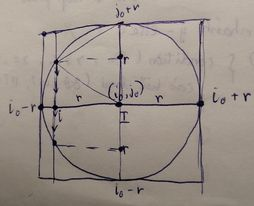

In [102]:
idx = 0
for pc in point_coor:
    statistic = []
    statistic.append(filter_str(name_list[idx]))
    statistic.append(lat_lon[idx][0])
    statistic.append(lat_lon[idx][1])
    idx += 1
    buffers_points = []
    for rad in Radius_line:
        circle = (pc[0], pc[1], rad)
        buffers_points.append(points_in_circle(circle, ds_arr))
    for bp in buffers_points:
        for x in uniq:
            cnt = 0
            for i in bp:
                if i == x:
                    cnt += 1
            statistic.append(cnt)
    data_row.append(statistic)
    

In [103]:
export_to_csv(header_row, data_row, path_csv)